In [1]:
import pandas as pd
import joblib
import numpy as np
from konlpy.tag import Okt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder

In [59]:
import pandas as pd
import glob

target_path = r'data/008_머니투데이/*.csv'
file_list = glob.glob(target_path)

df_list = []

for file in file_list:
    # 인코딩 예외 처리하며 읽기
    try:
        data = pd.read_csv(file, encoding='utf-8-sig')
    except:
        data = pd.read_csv(file, encoding='cp949')
    
    # --- 컬럼 생성 및 동일 키워드 입력 ---
    data['category'] = '머니투데이' 
    
    df_list.append(data)

final_df = pd.concat(df_list, ignore_index=True)
final_df.to_csv("머니투데이.csv")

In [75]:
import pandas as pd
import glob

target_path = r'data/언론사/*.csv'
file_list = glob.glob(target_path)

df_list = []

for file in file_list:
    # 인코딩 예외 처리하며 읽기
    try:
        data = pd.read_csv(file, encoding='utf-8-sig')
    except:
        data = pd.read_csv(file, encoding='cp949')
    df_list.append(data)
df = pd.concat(df_list, ignore_index=True)

In [77]:
df[df['category'] != '헤럴드경제']

,Unnamed: 0,날짜,제목,본문,링크,category
0,0,2025-12-01 23:25:00,"한국은행·국민연금, 650억弗 외환스왑 연장","정부, 원화값 방어 총력전 서학개미 증권사 상품 조사도 외환당국이 추락하는 원화...",https://n.news.naver.com/mnews/article/009/000...,매일경제
1,1,2025-12-01 23:18:00,“금융지주 회장들 연임 욕구 과해”…지배구조에 경고장 날린 금감원장,이찬진 금감원장 첫 간담회 2조 홍콩 ELS 과징금 부과에 “은행 사후노력 최대한...,https://n.news.naver.com/mnews/article/009/000...,매일경제
2,2,2025-12-01 23:10:00,"與野, 728조 예산안 '총액유지' 큰틀 합의",4조원대 감액에 양측 공감대 증액 항목·세부내용 최종협상 2일 본회의서 막판 처리 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제
3,3,2025-12-01 22:51:00,"11월 비수기에도…롯데관광개발, 제주 드림타워 카지노 실적 500억대 달성",제주 드림타워 카지노가 11월 비수기임에도 불구하고 3개월 연속 500억원대 매출 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제
4,4,2025-12-01 22:47:00,"인권위, 특검 수사관 고발 … ""양평 공무원에 진술 강요""",같은팀 근무 3명은 수사 의뢰 강압 없다던 내부감찰과 배치 국가인권위원회가 '50...,https://n.news.naver.com/mnews/article/009/000...,매일경제
...,...,...,...,...,...,...
69551,8459,2025-12-20 00:07:00,[민철기의 개똥法학] 내란전담재판부·법왜곡죄가 사법개혁 될 수 없는 이유,법왜곡죄 신설을 주요 내용으로 하는 형법 개정안과 내란전담재판부 설치법이 최근 국회...,https://n.news.naver.com/mnews/article/015/000...,한국경제
69552,8460,2025-12-20 00:06:00,"[MZ 톡톡] AI, 무엇을 믿지 않을 것인가","나와 내 가족, 친구의 얼굴이 등장하는 영상이 온라인에서 확산하고 있다고 가정해보자...",https://n.news.naver.com/mnews/article/015/000...,한국경제
69553,8461,2025-12-20 00:05:00,[부고] 김춘섭 전남대 국어국문학과 명예교수 별세 外,"▶김춘섭 전남대 국어국문학과 명예교수 별세, 이금림(드라마 작가) 남편상, 김한양·...",https://n.news.naver.com/mnews/article/015/000...,한국경제
69554,8462,2025-12-20 00:01:00,"가족 5명 떠나보내고도 '정시 출근'…""미쳤다""던 男의 반전 [성수영의 그때 그 사람들]","아내와 두 아들, 아버지, 절친한 친구. 이 모든 사람들을 단 2년만에 잃은 남자가...",https://n.news.naver.com/mnews/article/015/000...,한국경제


In [64]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. 저장된 경로 설정
model_path = "./my_kobert_model"

# 2. 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 3. 모델 및 토크나이저 불러오기
model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# 4. 라벨 인코딩
le = LabelEncoder()
le.classes_ = np.load('classes.npy', allow_pickle=True)

print("모델 로드")

모델 로드


In [78]:
import pandas as pd
from tqdm.auto import tqdm

def predict_industry_to_df(df, text_column='본문', batch_size=32, threshold=0.7):
    model.eval()
    
    # 1. 텍스트 추출 및 전처리 (결측값 대비)
    texts = df[text_column].fillna("").astype(str).tolist()
    
    all_labels = []
    all_probs = []
    
    print(f"분류 시작: 총 {len(texts)}개의 기사를 분석합니다.")
    
    # 2. RTX 5080 최적화를 위한 배치 추론
    with torch.inference_mode():
        for i in tqdm(range(0, len(texts), batch_size)):
            batch_texts = texts[i:i+batch_size]
            
            # 토크나이징 및 GPU 전송
            inputs = tokenizer(
                batch_texts, 
                return_tensors="pt", 
                truncation=True, 
                padding=True, 
                max_length=256
            ).to(device)
            
            # 모델 예측
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            max_probs, idxs = torch.max(probs, dim=1)
            
            # 결과 해석 및 임계값 적용
            for prob, idx in zip(max_probs.cpu().numpy(), idxs.cpu().numpy()):
                label_name = le.inverse_transform([idx])[0]
                
                # 확신도가 낮으면 '분류 불가' 처리
                if prob < threshold:
                    all_labels.append(f"분류 불가({prob:.2f})")
                else:
                    all_labels.append(label_name)
                all_probs.append(float(prob))
                
    # 3. 데이터프레임에 새로운 컬럼 추가
    df['산업'] = all_labels
    df['확신도'] = all_probs
    
    return df

# --- 실행 ---
# 데이터프레임에 적용
test = predict_industry_to_df(df)

# 결과 확인
print("\n 완료 --- 결과 ---")
print(test[['제목', '산업', '확신도']].head(10))

# 특정 산업(예: 건설)이 어떻게 분류되었는지 확인해보기
print("\n--- '건설'로 분류된 기사 샘플 ---")
print(test[test['산업'] == '건설'][['제목', '확신도']].head())
print("\n--- '자동차'로 분류된 기사 샘플 ---")
print(test[test['산업'] == '자동차'][['제목', '확신도']].head())
print("\n--- '헬스케어'로 분류된 기사 샘플 ---")
print(test[test['산업'] == '헬스케어'][['제목', '확신도']].head())

분류 시작: 총 79145개의 기사를 분석합니다.


  0%|          | 0/2474 [00:00<?, ?it/s]


 완료 --- 결과 ---
                                             제목    산업       확신도
0                      한국은행·국민연금, 650억弗 외환스왑 연장  해당없음  0.983676
1         “금융지주 회장들 연임 욕구 과해”…지배구조에 경고장 날린 금감원장  해당없음  0.980353
2                     與野, 728조 예산안 '총액유지' 큰틀 합의  해당없음  0.976810
3     11월 비수기에도…롯데관광개발, 제주 드림타워 카지노 실적 500억대 달성  해당없음  0.971551
4              인권위, 특검 수사관 고발 … "양평 공무원에 진술 강요"  해당없음  0.979231
5  “윤석열, 국회 월담하는 의원 ‘다 잡아’ 지시”…경찰청장, 이상민 재판서 진술  해당없음  0.981090
6       “비만은 질병” 선언한 WHO…위고비·마운자로 ‘공식 치료제’ 인정받아  헬스케어  0.895010
7             여야, 예산안 ‘총액유지’에 잠정 합의…“증액 협상은 아직”  해당없음  0.978274
8                 출근만 해도 서러운데 강추위까지…내륙 영하 5도 안팎  해당없음  0.983248
9       “위법한 명령은 불복종하겠다”...계엄 고개 숙인 경찰, 정치중립 선언  해당없음  0.980508

--- '건설'로 분류된 기사 샘플 ---
                                        제목       확신도
41     겨울에도 강하다...유진기업·동양, 내한 콘크리트 기술인증 취득  0.839856
43             '종묘 논쟁' 세운4구역 … 민간사업자 철수 수순  0.853569
98            ‘종묘 논쟁’ 세운4구역…민간사업자 결국 철수 수순  0.854613
103  '종묘 정쟁'에 낀 도심 개발사업 …SH가 땅매입 거절땐 좌초 위기 

### 산업별 기사 분류 현황 ###
해당없음           65366
자동차             3843
헬스케어            3608
건설              1913
분류 불가(0.65)      254
분류 불가(0.69)      247
분류 불가(0.67)      241
분류 불가(0.66)      235
분류 불가(0.68)      223
분류 불가(0.62)      214
분류 불가(0.64)      213
분류 불가(0.60)      212
분류 불가(0.57)      205
분류 불가(0.56)      200
분류 불가(0.59)      198
분류 불가(0.63)      194
분류 불가(0.53)      194
분류 불가(0.55)      191
분류 불가(0.54)      183
분류 불가(0.61)      181
분류 불가(0.52)      181
분류 불가(0.51)      180
분류 불가(0.58)      169
분류 불가(0.50)      165
분류 불가(0.49)      147
분류 불가(0.70)      128
분류 불가(0.48)       21
분류 불가(0.47)       12
분류 불가(0.46)       10
분류 불가(0.45)        5
분류 불가(0.44)        3
분류 불가(0.41)        2
분류 불가(0.42)        2
분류 불가(0.43)        2
분류 불가(0.40)        1
분류 불가(0.35)        1
분류 불가(0.39)        1
Name: 산업, dtype: int64
------------------------------
전체 기사 수: 79145개


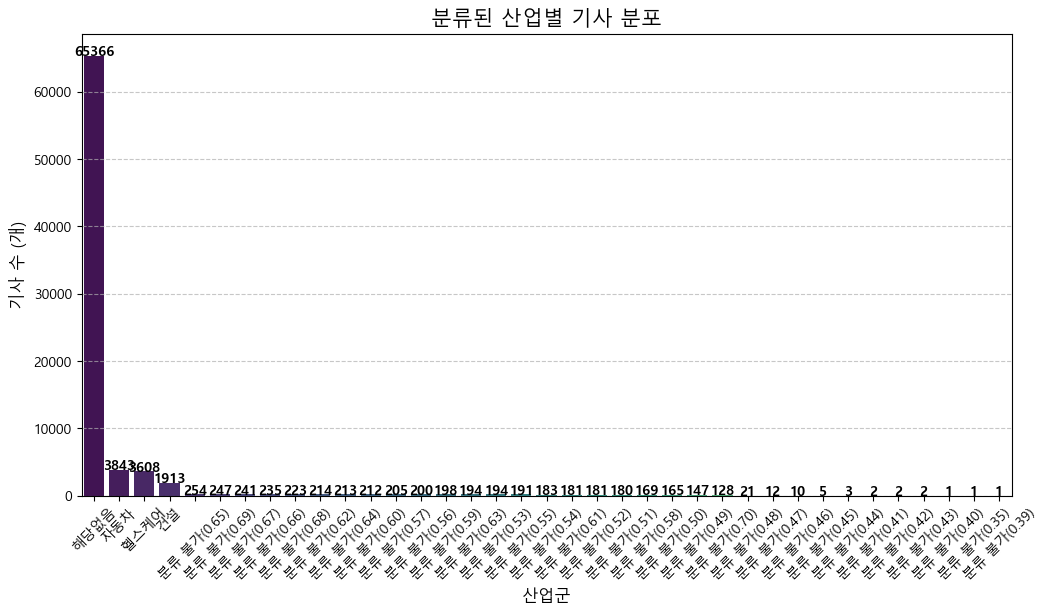

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (윈도우 환경)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 산업별 기사 개수 집계 (value_counts)
industry_counts = test['산업'].value_counts()

print("### 산업별 기사 분류 현황 ###")
print(industry_counts)
print("-" * 30)
print(f"전체 기사 수: {len(test)}개")

# 2. 시각화 (막대 그래프)
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')

plt.title('분류된 산업별 기사 분포', fontsize=15)
plt.xlabel('산업군', fontsize=12)
plt.ylabel('기사 수 (개)', fontsize=12)

# 막대 위에 숫자 표시
for i, v in enumerate(industry_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [84]:
test[test['산업']=='헬스케어']

,Unnamed: 0,날짜,제목,본문,링크,category,산업,확신도
6,6,2025-12-01 22:46:00,“비만은 질병” 선언한 WHO…위고비·마운자로 ‘공식 치료제’ 인정받아,위고비·마운자로 등 관련약 전세계 공식 치료지침 발표 세계보건기구(WHO)가 글...,https://n.news.naver.com/mnews/article/009/000...,매일경제,헬스케어,0.895010
19,19,2025-12-01 20:57:00,12월 1일 주요 공시,<유가증권시장> ◇DH오토넥스=결손금 보전을 위한 보통주 2주를 1주로 무상감자하...,https://n.news.naver.com/mnews/article/009/000...,매일경제,헬스케어,0.897169
39,39,2025-12-01 18:11:00,15조원 글로벌 간질환 시장 잡아라… 유한양행 ‘제2렉라자’ 후보 공개,R&D 전략 중심 축을 대사·간질환 분야로 재편 베링거인겔하임 반환 후 글로벌 1상...,https://n.news.naver.com/mnews/article/009/000...,매일경제,헬스케어,0.918313
93,93,2025-12-01 18:00:00,"삼성바이오, 제3캠퍼스 구축 … 7조 투입 최대 생산능력 확보",송도 11공구 용지 매입 계약 1만명 고용·경제효과 12조원 삼성바이오로직스가...,https://n.news.naver.com/mnews/article/009/000...,매일경제,헬스케어,0.917600
114,114,2025-12-01 17:52:00,"삼성바이오로직스, 제3바이오캠퍼스 구축…7조원 투입해 최대 생산능력 확보",송도 11공구 부지 매입 계약 1만명 고용·경제효과 12조원 삼성바이오로직스가 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제,헬스케어,0.919749
...,...,...,...,...,...,...,...,...
78823,9267,2025-12-19 10:36:00,"[김태열의 생생건강S펜] 재발률 높은 난소암, 간단한 혈액 검사로 ‘치료 효과’ 예측","서울아산병원 조현웅 교수팀, 혈액 수치 변화로 복강내온열항암화학요법 대상자 선별 근...",https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,헬스케어,0.897145
78941,9385,2025-12-19 08:41:00,"큐리언트, 독일 자회사 QLi5에 108억 유증 참여… PI-ADC 개발 가속",노벨화학상 수상자 로버트 후버 박사도 증자 참여… 지분율 64%로 확대 큐리언트...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,헬스케어,0.911193
78943,9387,2025-12-19 08:39:00,"헥토헬스케어, 진천선수촌에 1억원 상당 ‘오투부스터’ 기증","김석진 헥토헬스케어 대표(왼쪽에서 다섯번째), 김택수 국가대표선수촌장(여섯번째) 및...",https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,헬스케어,0.794280
78999,9443,2025-12-19 07:12:00,"메디엔진, 일라이릴리와 차세대 비만 치료제 개발 ‘맞손’",[메디엔진 제공] [헤럴드경제=최은지 기자] 대사질환 치료제를 개발하는 바이오의...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,헬스케어,0.917409


In [85]:
test[test['산업']=='건설']

,Unnamed: 0,날짜,제목,본문,링크,category,산업,확신도
41,41,2025-12-01 18:10:00,"겨울에도 강하다...유진기업·동양, 내한 콘크리트 기술인증 취득",유진그룹이 계열사 유진기업과 동양이 지난해 개발한 내한 콘크리트가 한국건축시공학회로...,https://n.news.naver.com/mnews/article/009/000...,매일경제,건설,0.839856
43,43,2025-12-01 18:09:00,'종묘 논쟁' 세운4구역 … 민간사업자 철수 수순,"한호건설, 특혜 논란 일자 ""보유토지 SH가 매입해달라"" 유네스코 세계유산인 서울...",https://n.news.naver.com/mnews/article/009/000...,매일경제,건설,0.853569
98,98,2025-12-01 17:58:00,‘종묘 논쟁’ 세운4구역…민간사업자 결국 철수 수순,"한호건설, 특혜 논란 일자 “보유토지 SH가 매입해달라” 유네스코 세계유산인 서...",https://n.news.naver.com/mnews/article/009/000...,매일경제,건설,0.854613
103,103,2025-12-01 17:57:00,'종묘 정쟁'에 낀 도심 개발사업 …SH가 땅매입 거절땐 좌초 위기,"한호건설, 세운 4구역 보유토지 SH에 매각 추진 SH, 한호 땅 사면 지분 70%...",https://n.news.naver.com/mnews/article/009/000...,매일경제,건설,0.840006
146,146,2025-12-01 17:26:00,DL이앤씨 부회장에 박상신,DL그룹은 1일 박상신 DL이앤씨 대표이사(사진)가 부회장으로 승진했다고 밝혔다. ...,https://n.news.naver.com/mnews/article/009/000...,매일경제,건설,0.778747
...,...,...,...,...,...,...,...,...
78915,9359,2025-12-19 09:18:00,“입주할 때까지 추가 비용 제로” 고금리 기조 속 ‘중도금 무이자’ 혜택 단지 관심↑,최근 5년간 천안 분양 단지 25곳 중 ‘중도금 무이자’ 초기 적용 단지는 단 4곳...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,건설,0.770987
78994,9438,2025-12-19 07:15:00,"대구도시개발공사, 2025 대한민국 주거복지대전 국무총리 표창 수상",[대구도시개발공사 제공] [헤럴드경제(대구)=김병진 기자]대구도시개발공사는 지난...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,건설,0.768801
79098,9542,2025-12-20 11:01:00,“로얄층되면 5억 아낀다”…잠실르엘 ‘로또 전세’ 또 나왔다[부동산360],"SH, 1월 제49차 장기전세주택의 입주자 모집 예정 디에이치 대치에델루이는 시세 ...",https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,건설,0.739974
79121,9565,2025-12-20 08:52:00,"성북구, 공공건축 공사장 5개소 선제 점검",광주 대표도서관 사고 발생에 따른 관내 공공건축공사장 선제점검 실시 외부전문가와 건...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,건설,0.843701


In [94]:
test[test['산업']=='자동차']

,Unnamed: 0,날짜,제목,본문,링크,category,산업,확신도
17,17,2025-12-01 21:10:00,"“중국 버리고 한국산 갈아탔다”...까다로운 호주인들, K-열차에 빠진 이유는",현대로템 시드니 열차 타보니 장애인 맞춤형 설계 승부수 화장실 넓고 긴급호출 버튼 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제,자동차,0.969394
57,57,2025-12-01 18:07:00,글로벌 車·화학 CEO들 … 미래수소사업 머리맞대,현대차 '수소위 CEO서밋' 주관 현대차그룹이 2일 서울에서 열리는 '수소위원회 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제,자동차,0.981043
108,108,2025-12-01 17:54:00,"한국·세르비아, 첫 CEPA 공식협상",포괄적경제동반자협정 추진 리튬 공급망 확보 기대 커져 한국이 세르비아와 포괄적경제...,https://n.news.naver.com/mnews/article/009/000...,매일경제,자동차,0.950522
110,110,2025-12-01 17:54:00,"10대 제조업, 올해 설비투자에 122조 '선방'",민관합동 산업투자전략회의 대기업 투자 대폭 늘린 영향 국내 대기업들의 설비투자...,https://n.news.naver.com/mnews/article/009/000...,매일경제,자동차,0.729926
111,111,2025-12-01 17:54:00,K반도체 호황에 빛난 수출 … 11월 610억달러 '역대 최대',4분기 D램값 최대 6배 급등에 반도체 수출 비중 30%로 상승 올 11월 한국의...,https://n.news.naver.com/mnews/article/009/000...,매일경제,자동차,0.902880
...,...,...,...,...,...,...,...,...
79059,9503,2025-12-20 18:36:00,대구 수성구 연호동서 SUV·시내버스 충돌,[대구소방안전본부 제공] [헤럴드경제(대구)=김병진 기자]대구 수성구 연호동에서...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,자동차,0.921605
79080,9524,2025-12-20 13:41:00,“보릿고개 길어지나” ‘포드 쇼크’에 와르르…눈물나는 2차전지株 [투자360],[챗GPT를 사용해 제작함] [헤럴드경제=문이림 기자] 미국 완성차 기업 포드와...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,자동차,0.959186
79088,9532,2025-12-20 12:42:00,친환경 외치던 EU마저 “내연車 제로 후진” 왜?[디브리핑],2030년 탄소감축 목표 후퇴·하이브리드 허용 독일·이탈리아 차업체 압박에 규제 완...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,자동차,0.979361
79114,9558,2025-12-20 09:19:00,마약하고 포르쉐로 경찰 따돌리다가 6중 추돌…20대 징역 5년 선고,경찰 정지명령 무시 후 도주 시도 [연합] [헤럴드경제=정석준 기자] 마약에...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,자동차,0.924099


In [95]:
test[test['산업']=='해당없음']

,Unnamed: 0,날짜,제목,본문,링크,category,산업,확신도
0,0,2025-12-01 23:25:00,"한국은행·국민연금, 650억弗 외환스왑 연장","정부, 원화값 방어 총력전 서학개미 증권사 상품 조사도 외환당국이 추락하는 원화...",https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음,0.983676
1,1,2025-12-01 23:18:00,“금융지주 회장들 연임 욕구 과해”…지배구조에 경고장 날린 금감원장,이찬진 금감원장 첫 간담회 2조 홍콩 ELS 과징금 부과에 “은행 사후노력 최대한...,https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음,0.980353
2,2,2025-12-01 23:10:00,"與野, 728조 예산안 '총액유지' 큰틀 합의",4조원대 감액에 양측 공감대 증액 항목·세부내용 최종협상 2일 본회의서 막판 처리 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음,0.976810
3,3,2025-12-01 22:51:00,"11월 비수기에도…롯데관광개발, 제주 드림타워 카지노 실적 500억대 달성",제주 드림타워 카지노가 11월 비수기임에도 불구하고 3개월 연속 500억원대 매출 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음,0.971551
4,4,2025-12-01 22:47:00,"인권위, 특검 수사관 고발 … ""양평 공무원에 진술 강요""",같은팀 근무 3명은 수사 의뢰 강압 없다던 내부감찰과 배치 국가인권위원회가 '50...,https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음,0.979231
...,...,...,...,...,...,...,...,...
79139,9583,2025-12-20 07:01:00,"SK하이닉스, 美 ‘빅테크 허브’에 새 둥지…고객사 밀착 마크 강화","시애틀 벨뷰, 엔비디아·구글·MS 등 글로벌 빅테크 거점 랜드마크 ‘시티 센터 밸뷰...",https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,해당없음,0.943725
79140,9584,2025-12-20 07:01:00,[단독] 쿠팡 물류센터 9곳 ‘무급휴가’ 돌입…사무직도 ‘칼바람’ 우려,"물류센터 VTO 시행 확대, 쿠팡 내부 불안감 증가 사무직 인사고과 시즌 겹쳐…해고...",https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,해당없음,0.969862
79142,9586,2025-12-20 07:00:00,"“궁금했던 컬리음식, 먹어보고 산다”…컬리푸드페스타, 올해도 문전성시 [르포]",규모 줄이고 질 높인 ‘컬리푸드페스타 2025’ 주말까지 개최…나흘간 2.3만명 방...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,해당없음,0.980762
79143,9587,2025-12-20 06:31:00,美·中 전쟁서 ‘글로벌 톱3’ 우뚝…토종 AI 자존심 세웠다 [그 회사 어때?],LG AI연구원 자체 모델 ‘엑사원’으로 美 GPT·中 딥시크와 경쟁 4개월마다 A...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,해당없음,0.979960


In [100]:
test = test.drop(columns = 'Unnamed: 0')

In [103]:
test.to_csv('industry_labed.csv', index=False)

In [105]:
test=pd.read_csv('industry_labed.csv')

In [129]:
test

,날짜,제목,본문,링크,category,산업
0,2025-12-01 23:25:00,"한국은행·국민연금, 650억弗 외환스왑 연장","정부, 원화값 방어 총력전 서학개미 증권사 상품 조사도 외환당국이 추락하는 원화...",https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음
1,2025-12-01 23:18:00,“금융지주 회장들 연임 욕구 과해”…지배구조에 경고장 날린 금감원장,이찬진 금감원장 첫 간담회 2조 홍콩 ELS 과징금 부과에 “은행 사후노력 최대한...,https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음
2,2025-12-01 23:10:00,"與野, 728조 예산안 '총액유지' 큰틀 합의",4조원대 감액에 양측 공감대 증액 항목·세부내용 최종협상 2일 본회의서 막판 처리 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음
3,2025-12-01 22:51:00,"11월 비수기에도…롯데관광개발, 제주 드림타워 카지노 실적 500억대 달성",제주 드림타워 카지노가 11월 비수기임에도 불구하고 3개월 연속 500억원대 매출 ...,https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음
4,2025-12-01 22:47:00,"인권위, 특검 수사관 고발 … ""양평 공무원에 진술 강요""",같은팀 근무 3명은 수사 의뢰 강압 없다던 내부감찰과 배치 국가인권위원회가 '50...,https://n.news.naver.com/mnews/article/009/000...,매일경제,해당없음
...,...,...,...,...,...,...
79140,2025-12-20 07:01:00,[단독] 쿠팡 물류센터 9곳 ‘무급휴가’ 돌입…사무직도 ‘칼바람’ 우려,"물류센터 VTO 시행 확대, 쿠팡 내부 불안감 증가 사무직 인사고과 시즌 겹쳐…해고...",https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,해당없음
79141,2025-12-20 07:00:00,"[영상] ‘반백년만에 재건축’ 여의도, 평당 1억 넘겼다던데[부동산360]",‘대교아파트’ 등 여의도 구축 아파트 단지 임장 한강·공원·업무지구 품은 입지…“반...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,건설
79142,2025-12-20 07:00:00,"“궁금했던 컬리음식, 먹어보고 산다”…컬리푸드페스타, 올해도 문전성시 [르포]",규모 줄이고 질 높인 ‘컬리푸드페스타 2025’ 주말까지 개최…나흘간 2.3만명 방...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,해당없음
79143,2025-12-20 06:31:00,美·中 전쟁서 ‘글로벌 톱3’ 우뚝…토종 AI 자존심 세웠다 [그 회사 어때?],LG AI연구원 자체 모델 ‘엑사원’으로 美 GPT·中 딥시크와 경쟁 4개월마다 A...,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,해당없음


In [130]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

# 1. 실제 존재하는 한국어 감성 분석 모델로 교체
# jaehyeong 모델은 뉴스, 댓글 등 범용 한국어 감성 분석에 매우 뛰어납니다.
model_name = "jaehyeong/koelectra-base-v3-generalized-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to("cuda")

def analyze_sentiment_batch(texts, batch_size=64):
    model.eval()
    all_scores = []
    
    # 8만 건에 가까운 데이터를 처리하기 위해 tqdm으로 진행률 표시
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size].astype(str).tolist() # 문자열 변환
        
        # 토큰화 및 GPU 전송
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to("cuda")
        
        with torch.no_grad():
            outputs = model(**inputs)
            # 확률값 계산 (Softmax)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            
            # 모델 출력 구조: [0: 부정 확률, 1: 긍정 확률]
            # (긍정 확률 - 부정 확률)을 계산하면 -1.0 ~ 1.0 사이의 값이 나옵니다.
            # 예: 긍정 0.9, 부정 0.1 이면 점수는 0.8
            batch_scores = (probs[:, 1] - probs[:, 0]).cpu().numpy()
            all_scores.extend(batch_scores)
            
    return all_scores

# 2. 데이터프레임 적용
# '본문' 컬럼의 텍스트를 사용하여 점수 생성
df['sentiment_score'] = analyze_sentiment_batch(df['본문'])

# 결과 확인
print(df[['제목', 'sentiment_score']].head())

KeyError: '본문'

In [127]:
df

0        False
1        False
2        False
3        False
4        False
         ...  
79140    False
79141     True
79142    False
79143    False
79144    False
Name: 산업, Length: 79145, dtype: bool

In [117]:
df.drop(columns = 'Unnamed: 0')
df = df.drop(columns = '확신도')

In [126]:
df['산업']!= '해당없음'

KeyError: '산업'

In [123]:
df

0        False
1        False
2        False
3        False
4        False
         ...  
79140    False
79141     True
79142    False
79143    False
79144    False
Name: 산업, Length: 79145, dtype: bool